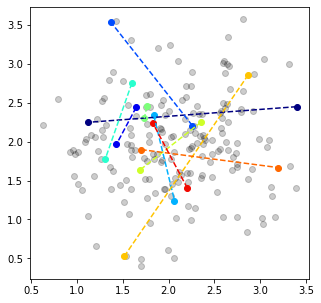

In [5]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch import distributions as dist
colors = plt.cm.jet

mean = torch.Tensor([2,2])
normal = dist.MultivariateNormal(mean, 0.4*torch.eye(2))

M = 100
view1 = normal.rsample(sample_shape=[M,])
view2 = normal.rsample(sample_shape=[M,])

for tensor in [view1, view2]:
    tensor.requires_grad= True

VIS_NUM = 10

plt.rcParams["figure.figsize"] = [5, 5]

def to_xy(data):
    numpy_data = data.T.detach().numpy()
    return numpy_data[0], numpy_data[1]

def vis_colored_data(view1, view2):
    for i in range(VIS_NUM):
        color = colors(i/VIS_NUM)
        x1, y1 = to_xy(view1[i:i+1,:])
        x2, y2 = to_xy(view2[i:i+1,:])
        plt.scatter(x=x1, y=y1, color=color)
        plt.scatter(x=x2, y=y2, color=color)
        plt.plot([x1, x2], [y1, y2], linestyle='--', color=color)
        
def vis_data(view1, view2):
    x, y = to_xy(torch.cat([view1[VIS_NUM:,:], view2[VIS_NUM:,:]]))
    plt.scatter(x=x, y=y, color='black', alpha=0.2)
    vis_colored_data(view1, view2)
    
vis_data(view1, view2)